### Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje no supervisado

# Density Based Scan Clustering (DBSCAN) - Clustering
### `Skillsforindustry.org`


In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
datos =pd.read_csv('Multishape.csv')

In [4]:
datos.head()

,x,y,shape
0,-0.803739,-0.853053,1
1,0.852851,0.367618,1
2,0.927180,-0.274902,1
3,-0.752626,-0.511565,1
4,0.706846,0.810679,1


<AxesSubplot:>

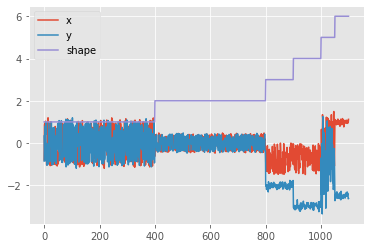

In [9]:
datos.plot()

In [ ]:
#revisa mas info de scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

<AxesSubplot:xlabel='x', ylabel='y'>

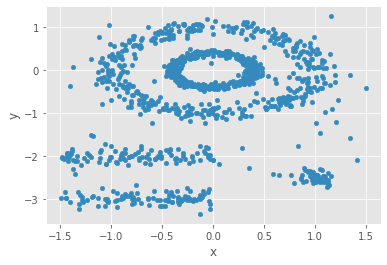

In [10]:
datos.plot.scatter(*["x", "y"])
#datos.plot("x", "y")


### Modelo



Con la clase `sklearn.cluster.DBSCAN` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo DBSCAN. Entre sus parámetros destacan:

* `eps:`

* `min_samples:`

* `metric:` métrica utilizada como distancia. Puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. Si se utiliza `linkage=“ward”`, solo se permite “euclidean”.

In [14]:
# Escalado de datos
X = datos.drop(columns='shape').to_numpy()
X

array([[-0.80373926, -0.85305261],
       [ 0.85285073,  0.36761844],
       [ 0.92717951, -0.27490244],
       ...,
       [ 0.98955472, -2.47522534],
       [ 0.97920001, -2.63757849],
       [ 1.12193084, -2.61905398]])

<AxesSubplot:xlabel='0', ylabel='1'>

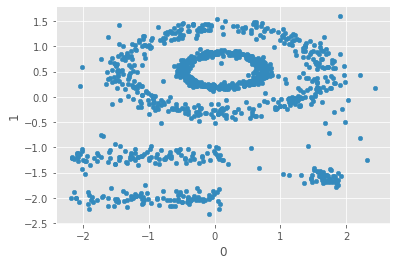

In [20]:
X_scaled = scale(X) #(X - mean(x) )/ std(X)
pd.DataFrame(X_scaled).plot.scatter(*[0, 1])

In [13]:
#?DBSCAN

In [37]:
# Modelo
modelo_dbscan = DBSCAN(
                    eps          = .2,
                    min_samples  = 10,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=X_scaled)

DBSCAN(eps=0.2, min_samples=10)

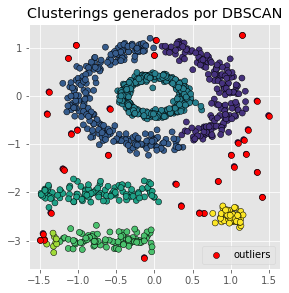

In [38]:
# Clasificación
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [39]:
# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 7
Número de outliers encontrados: 34
